In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/household-power-consumption/household_power_consumption.txt


In [2]:
# Reading our data
df = pd.read_csv("/kaggle/input/household-power-consumption/household_power_consumption.txt", delimiter=';', infer_datetime_format=True, parse_dates={'datetime': [0, 1]}, index_col=['datetime'])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# replace all "?" in the dataset with NaN
df.replace("?", "NaN", inplace=True)

In [5]:
# change our dataset type
df.astype(float)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [6]:
# replace the NaN values with the numpy nan
df.replace({"NaN": np.nan}, inplace=True)

In [7]:
# check for number of Na Values in each column
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
# fill the na values in each column with the mean of their respective columns

df.Global_active_power.fillna(df.Global_active_power.mean(), inplace=True)
df.Sub_metering_3.fillna(df.Sub_metering_3.mean(), inplace=True)
df.Global_reactive_power.fillna(df.Global_reactive_power.mean(), inplace=True)
df.Global_intensity.fillna(df.Global_intensity.mean(), inplace=True)
df.Voltage.fillna(df.Voltage.mean(), inplace=True)
df.Sub_metering_1.fillna(df.Sub_metering_1.mean(), inplace=True)
df.Sub_metering_2.fillna(df.Sub_metering_2.mean(), inplace=True)

In [9]:
# check for na values again to be sure
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
# calculating total energy consumed every minute
energy_consumed = ((df["Global_active_power"]*1000)/60 - df.Sub_metering_1 - df.Sub_metering_2 - df.Sub_metering_3)

In [11]:
# create a new column in our dataset and assign the energy consumed values to it
df["energy_consumed"] = energy_consumed
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [12]:
#Upsample to daily data points
df_daily = df.resample('D').mean()

In [13]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed
datetime,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


In [14]:
df_daily.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed
datetime,,,,,,,,
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889,11.753194
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417,11.355741
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889,9.562130
2010-11-25,0.993864,0.080644,241.536257,4.169444,0.747222,0.295833,3.522222,11.999120
2010-11-26,1.178230,0.095666,240.291029,4.956295,0.855107,0.304830,7.908947,10.568277


In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'GAP')

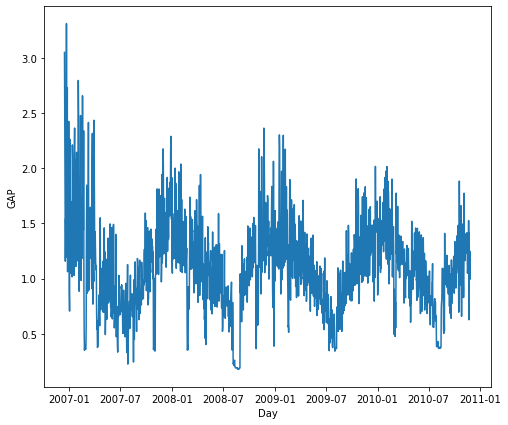

In [16]:
# make a plot of our global active power against every month
plt.figure(figsize=(8,7))
plt.plot(df_daily.index, df_daily.Global_active_power)
plt.xlabel('Day')
plt.ylabel('GAP') 

In [17]:
# get the pearson correlation of our dataset
df_daily.corr(method ='pearson')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed
Global_active_power,1.000000,0.036001,0.111562,0.999182,0.537367,0.477530,0.733220,0.889129
Global_reactive_power,0.036001,1.000000,-0.059897,0.057564,0.318835,0.181222,0.031286,-0.103277
Voltage,0.111562,-0.059897,1.000000,0.085787,-0.073601,-0.080416,0.168036,0.127418
Global_intensity,0.999182,0.057564,0.085787,1.000000,0.549419,0.486557,0.724682,0.886731
Sub_metering_1,0.537367,0.318835,-0.073601,0.549419,1.000000,0.251086,0.305883,0.349441
Sub_metering_2,0.477530,0.181222,-0.080416,0.486557,0.251086,1.000000,0.197472,0.255693
Sub_metering_3,0.733220,0.031286,0.168036,0.724682,0.305883,0.197472,1.000000,0.451207
energy_consumed,0.889129,-0.103277,0.127418,0.886731,0.349441,0.255693,0.451207,1.000000


In [18]:
df_MA = df_daily.copy()
MA = df_MA['energy_consumed'].rolling(12).mean()

Text(0, 0.5, 'energy_consumed')

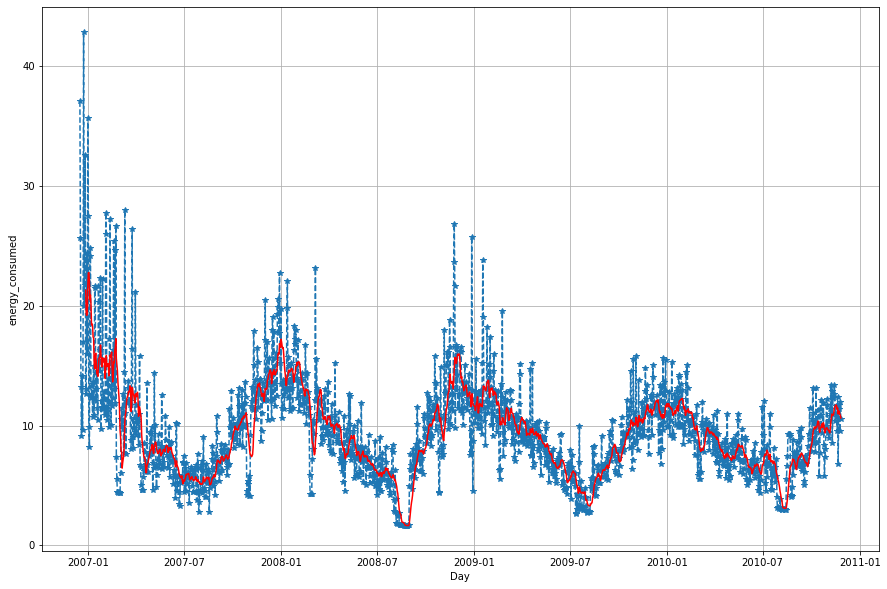

In [19]:
plt.figure(figsize=(15 , 10))
plt.plot(df_daily.index, df_daily.energy_consumed, '--' , marker= '*')
plt.plot(MA, color="red")
plt.grid()
plt.xlabel('Day')
plt.ylabel('energy_consumed') 

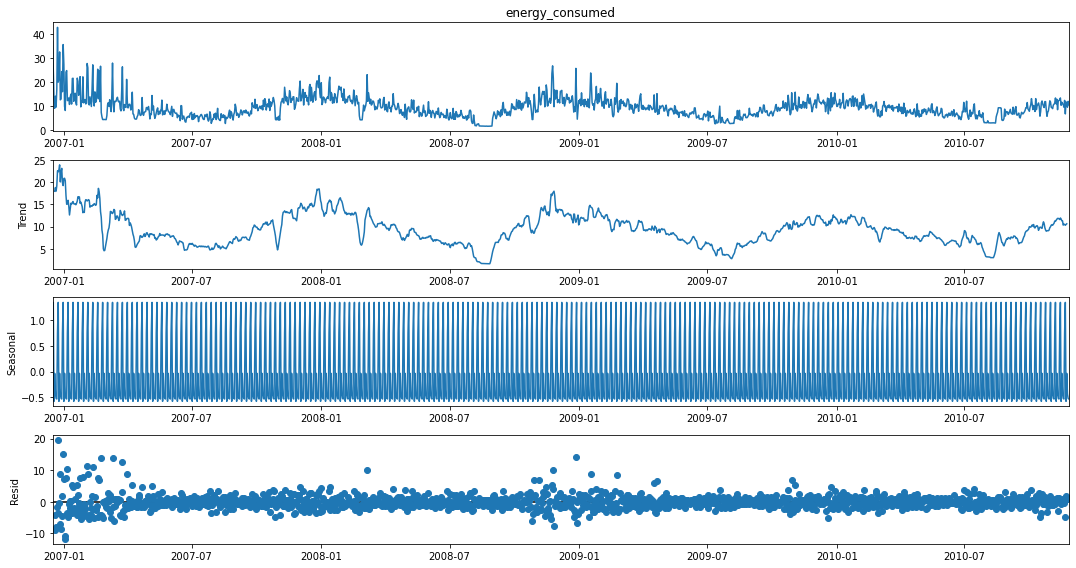

In [20]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_daily['energy_consumed'], model= 'additive')

decompose_series.plot()
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['energy_consumed'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')


for k, v in adf_result[4].items():
    print(f'{k} : {v}')

ADF Statistic: -3.8983624953049283
p-value: 0.0020469313442253974
No. of lags used: 20
No. of observations used : 1421
Critical Values:
1% : -3.4349602407782758
5% : -2.8635761009296763
10% : -2.5678540089914974


In [22]:
# get only the energy_consumed column for our prediction
dfx = df_daily["energy_consumed"]

In [23]:
dfx

datetime
2006-12-16    37.073064
2006-12-17    25.657407
2006-12-18    13.214190
2006-12-19     9.119375
2006-12-20    14.156111
                ...    
2010-11-22    11.753194
2010-11-23    11.355741
2010-11-24     9.562130
2010-11-25    11.999120
2010-11-26    10.568277
Freq: D, Name: energy_consumed, Length: 1442, dtype: float64

In [24]:
from pandas import DataFrame
# create a dataframe from the list returned
dfy = DataFrame(dfx)

In [25]:
# reset index of our dataset
dfy.reset_index(inplace=True)

In [26]:
# renaming the columns to work with our prohpet model
dfy = dfy.rename(columns={ "datetime" : "ds" , "energy_consumed" : "y" })

In [27]:
# have a quick look at our data
dfy

,ds,y
0,2006-12-16,37.073064
1,2006-12-17,25.657407
2,2006-12-18,13.214190
3,2006-12-19,9.119375
4,2006-12-20,14.156111
...,...,...
1437,2010-11-22,11.753194
1438,2010-11-23,11.355741
1439,2010-11-24,9.562130
1440,2010-11-25,11.999120


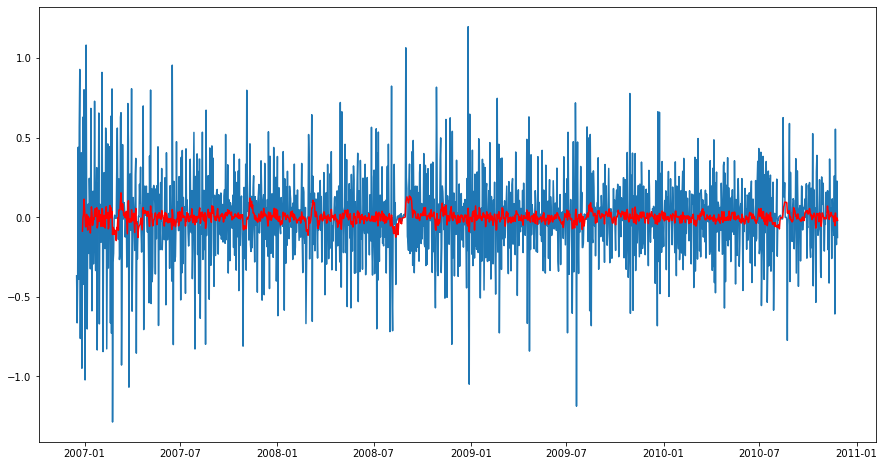

In [28]:
df_log = np.log(dfx)
df_diff = df_log.diff(periods = 1)

plt.plot(df_diff.index, df_diff, '-')
plt.plot(df_diff.rolling(12).mean(), color= 'red') 

In [29]:
df_log

datetime
2006-12-16    3.612891
2006-12-17    3.244832
2006-12-18    2.581291
2006-12-19    2.210401
2006-12-20    2.650146
                ...   
2010-11-22    2.464125
2010-11-23    2.429723
2010-11-24    2.257810
2010-11-25    2.484833
2010-11-26    2.357857
Freq: D, Name: energy_consumed, Length: 1442, dtype: float64

In [30]:
df_diff.fillna(0, inplace=True)

## ACF and PACF

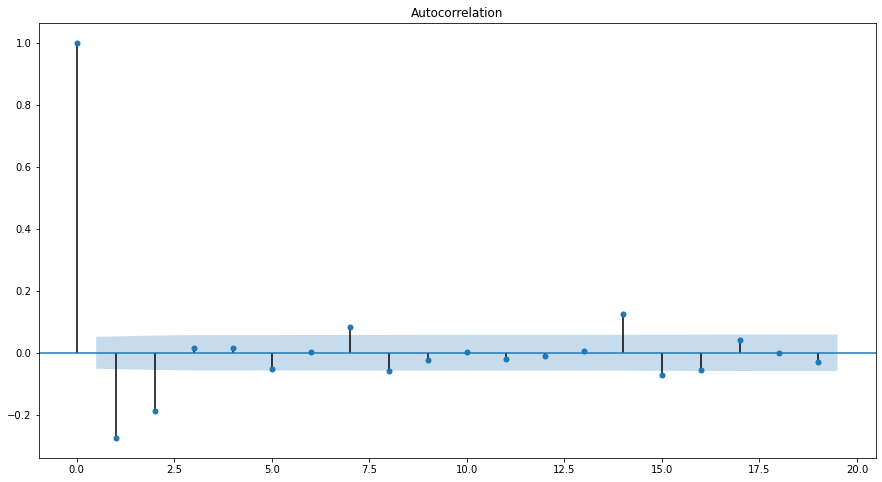

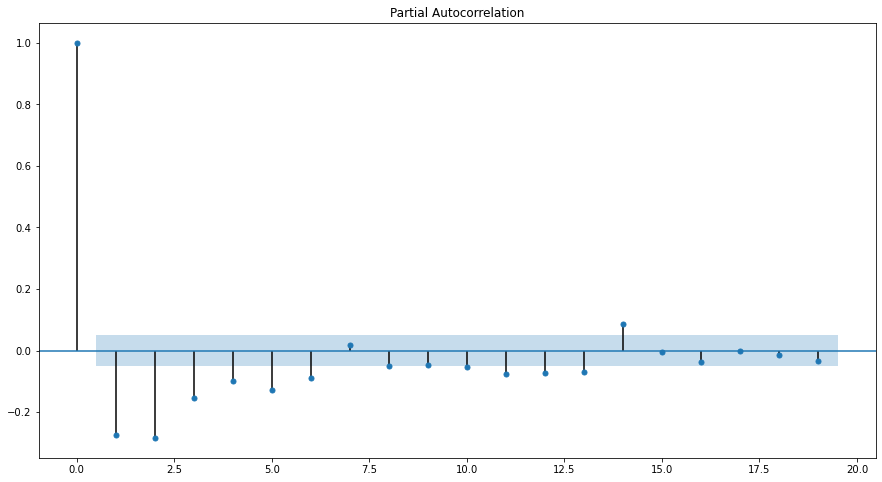

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF
plot_acf(df_diff, lags = range( 0 , 20 ))
plt.show()

#PACF
plot_pacf(df_diff, lags = range( 0 , 20 ))
plt.show() 

# ARIMA

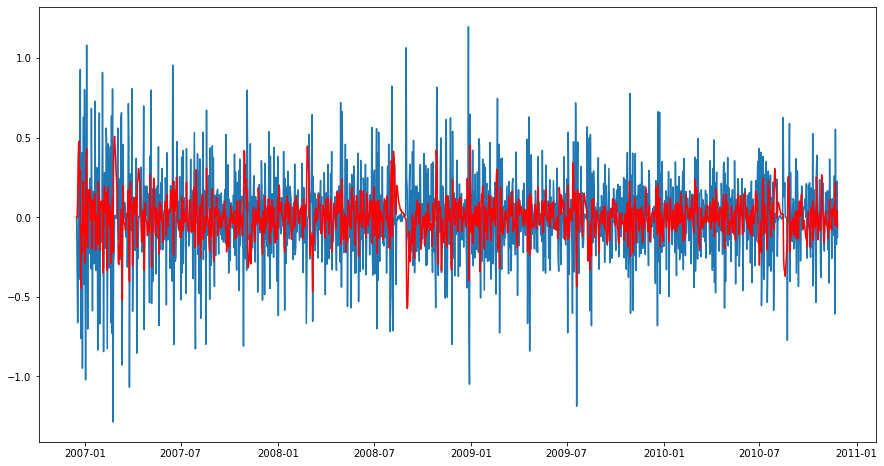

In [32]:
from statsmodels.tsa.arima_model import ARIMA
ARIMA_model = ARIMA(df_diff, order=( 2 , 0 , 1 )) 
ARIMA_results = ARIMA_model.fit(disp=0)
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color= 'red' ) 

# Prophet

In [33]:
# creating and fit our model on the data (dfy)

from fbprophet import Prophet
model = Prophet()
model.fit(dfy)

In [34]:
#predict for the next 10 months

future = model.make_future_dataframe(periods=10, freq= 'M')
forecast = model.predict(future)
forecast.head()
forecast[['ds' , 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,17.822912,14.380881,21.628163,12.407382,12.407382,12.407382
1,2006-12-17,18.428685,15.043481,22.082744,12.390902,12.390902,12.390902
2,2006-12-18,16.533241,12.882717,20.164575,12.374423,12.374423,12.374423
3,2006-12-19,17.160039,13.560071,20.615586,12.357943,12.357943,12.357943
4,2006-12-20,16.803875,13.514781,20.441763,12.341464,12.341464,12.341464
...,...,...,...,...,...,...,...
1447,2011-04-30,9.405393,5.602591,12.957476,9.776472,9.588072,9.964021
1448,2011-05-31,7.784875,4.246795,11.257654,9.863914,9.614344,10.106903
1449,2011-06-30,6.305933,2.694466,9.640846,9.948534,9.639596,10.254463
1450,2011-07-31,6.678781,3.007887,9.990472,10.035976,9.654792,10.412304


In [35]:
# take a look at our forecast/predicted data
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,12.407382,14.380881,21.628163,12.407382,12.407382,5.415530,5.415530,5.415530,0.835238,0.835238,0.835238,4.580292,4.580292,4.580292,0.0,0.0,0.0,17.822912
1,2006-12-17,12.390902,15.043481,22.082744,12.390902,12.390902,6.037783,6.037783,6.037783,1.365688,1.365688,1.365688,4.672095,4.672095,4.672095,0.0,0.0,0.0,18.428685
2,2006-12-18,12.374423,12.882717,20.164575,12.374423,12.374423,4.158818,4.158818,4.158818,-0.601774,-0.601774,-0.601774,4.760592,4.760592,4.760592,0.0,0.0,0.0,16.533241
3,2006-12-19,12.357943,13.560071,20.615586,12.357943,12.357943,4.802096,4.802096,4.802096,-0.041392,-0.041392,-0.041392,4.843488,4.843488,4.843488,0.0,0.0,0.0,17.160039
4,2006-12-20,12.341464,13.514781,20.441763,12.341464,12.341464,4.462410,4.462410,4.462410,-0.456132,-0.456132,-0.456132,4.918543,4.918543,4.918543,0.0,0.0,0.0,16.803875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2011-04-30,9.776472,5.602591,12.957476,9.588072,9.964021,-0.371079,-0.371079,-0.371079,0.835238,0.835238,0.835238,-1.206317,-1.206317,-1.206317,0.0,0.0,0.0,9.405393
1448,2011-05-31,9.863914,4.246795,11.257654,9.614344,10.106903,-2.079039,-2.079039,-2.079039,-0.041392,-0.041392,-0.041392,-2.037647,-2.037647,-2.037647,0.0,0.0,0.0,7.784875
1449,2011-06-30,9.948534,2.694466,9.640846,9.639596,10.254463,-3.642601,-3.642601,-3.642601,-0.542582,-0.542582,-0.542582,-3.100019,-3.100019,-3.100019,0.0,0.0,0.0,6.305933
1450,2011-07-31,10.035976,3.007887,9.990472,9.654792,10.412304,-3.357195,-3.357195,-3.357195,1.365688,1.365688,1.365688,-4.722883,-4.722883,-4.722883,0.0,0.0,0.0,6.678781


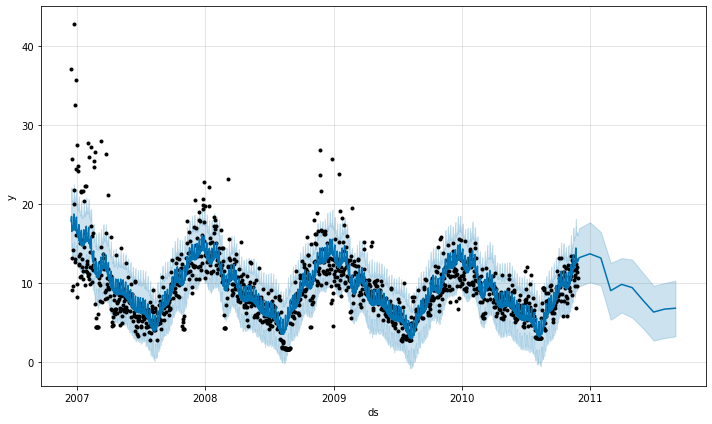

In [36]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries 
model.plot(forecast)
plt.show()

Text(0, 0.5, 'trend')

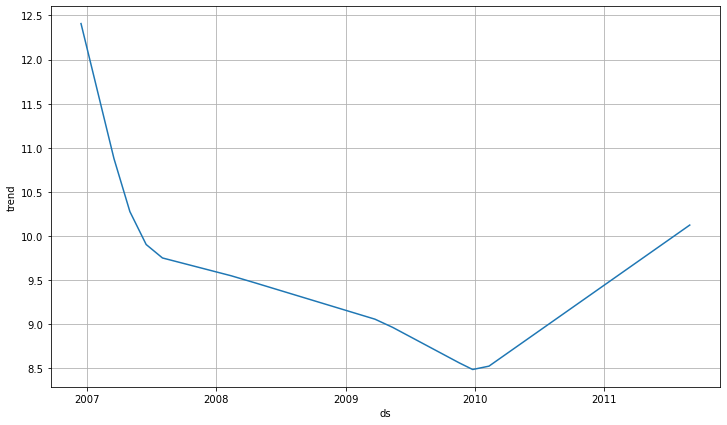

In [37]:
# create a plot for our trend

plt.figure(figsize=(12 , 7))
plt.plot(forecast.ds, forecast.trend)
plt.grid()
plt.xlabel('ds')
plt.ylabel('trend')

Text(0, 0.5, 'yearly')

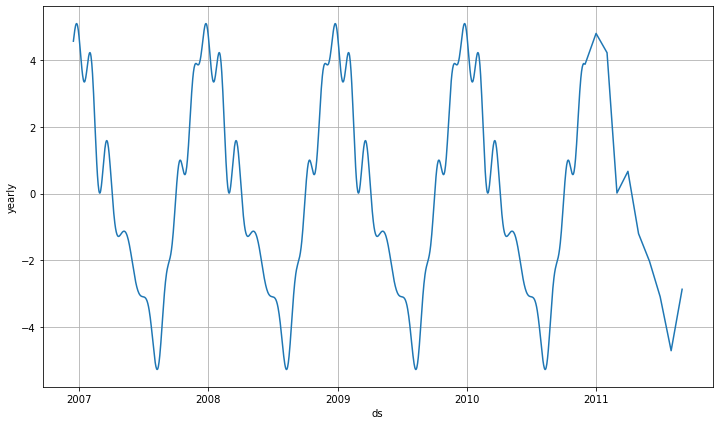

In [38]:
# create a plot for the yearly values in our forecast data

plt.figure(figsize=(12 , 7))
plt.plot(forecast.ds, forecast.yearly)
plt.grid()
plt.xlabel('ds')
plt.ylabel('yearly')

In [39]:
# getting the expected and predicted values
expected = dfy.y
predictions = forecast.yhat

In [40]:
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [19.250152223921877, 7.228722207097249, -3.3190510597638365, -8.040664049903103, -2.6477634085924127, -7.1687991116667895, 0.1514054775726521, 24.668799443520946, 1.2744809165945483, 4.99808400501275, 15.31570140697302, -4.214800867174926, -3.685982176207471, 7.809323018263765, -1.897004832655682, 17.34622452725596, 11.234161281801171, -6.796710846336239, -7.949403493058734, 8.24161356860009, 9.08190239795512, -4.692797571698625, -5.015246329398268, -1.854668157696823, -5.020484353355863, -1.5239642171983672, 0.021183745862055403, -4.026947391010879, 5.314513610183052, 4.967785270074209, -2.6507979302015166, -2.1421281345094165, 0.6002759177328052, -3.233694387657561, -4.258385086468802, 5.539571191466699, 3.591985283075953, -0.2867959762475305, 0.8634495678761542, 7.18585550735461, -5.41050861846235, -3.129145120919528, -5.053487925695075, 5.043495676963083, -3.8825860340752474, -3.4981765378377787, -2.653731143210294, -4.415379471208052, -4.09187271681386, 11.1755188

In [41]:
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -0.000573
